In [1]:
using DataFrames
using LightGraphs
using LinearAlgebra
using MatrixNetworks
using Plots
using SparseArrays
using VegaDatasets
using VegaLite

In [2]:
airports = dataset("airports")
flightsairport = dataset("flights-airport")

origin,destination,count
"""ABE""","""ATL""",853
"""ABE""","""BHM""",1
"""ABE""","""CLE""",805
"""ABE""","""CLT""",465
"""ABE""","""CVG""",247
"""ABE""","""DTW""",997
"""ABE""","""JFK""",3
"""ABE""","""LGA""",9
"""ABE""","""ORD""",1425
"""ABE""","""PHL""",2


In [3]:
typeof(flightsairport)

VegaDatasets.VegaDataset

In [4]:
flightsairport_df = DataFrame(flightsairport);

In [5]:
allairports = vcat(flightsairport_df[!, :origin], 
                   flightsairport_df[!, :destination])
uairports = unique(allairports)

305-element Array{String,1}:
 "ABE"
 "ABI"
 "ABQ"
 "ABY"
 "ACK"
 "ACT"
 "ACV"
 "ACY"
 "ADK"
 "ADQ"
 "AEX"
 "AGS"
 "AKN"
 ⋮
 "TYR"
 "TYS"
 "VLD"
 "VPS"
 "WRG"
 "WYS"
 "XNA"
 "YAK"
 "YKM"
 "YUM"
 "CYS"
 "OGD"

In [6]:
typeof(airports)

VegaDatasets.VegaDataset

In [7]:
airports_df = DataFrame(airports);

In [8]:
subsetairports = map(
    i -> findfirst(airports_df[!, :iata] .== uairports[i]), 
    1:length(uairports))
airports_df_subset = airports_df[subsetairports, :]

,iata,name,city,state,country
,String,String,String,String,String
1,ABE,Lehigh Valley International,Allentown,PA,USA
2,ABI,Abilene Regional,Abilene,TX,USA
3,ABQ,Albuquerque International,Albuquerque,NM,USA
4,ABY,Southwest Georgia Regional,Albany,GA,USA
5,ACK,Nantucket Memorial,Nantucket,MA,USA
6,ACT,Waco Regional,Waco,TX,USA
7,ACV,Arcata,Arcata/Eureka,CA,USA
8,ACY,Atlantic City International,Atlantic City,NJ,USA
9,ADK,Adak,Adak,AK,USA


In [9]:
# Make adj matrix
ei_ids = findfirst.(isequal.(flightsairport_df[!, :origin]), [uairports])
ej_ids = findfirst.(isequal.(flightsairport_df[!, :destination]), 
                    [uairports])
edgeweights = flightsairport_df[!, :count];

In [10]:
A = sparse(ei_ids, ej_ids, 1, length(uairports), length(uairports))
A = max.(A, A')

305×305 SparseMatrixCSC{Int64,Int64} with 5668 stored entries:
  [19 ,   1]  =  1
  [30 ,   1]  =  1
  [62 ,   1]  =  1
  [64 ,   1]  =  1
  [74 ,   1]  =  1
  [88 ,   1]  =  1
  [151,   1]  =  1
  [163,   1]  =  1
  [168,   1]  =  1
  [188,   1]  =  1
  [211,   1]  =  1
  [220,   1]  =  1
  ⋮
  [54 , 301]  =  1
  [152, 301]  =  1
  [268, 302]  =  1
  [115, 303]  =  1
  [143, 303]  =  1
  [156, 303]  =  1
  [158, 303]  =  1
  [221, 303]  =  1
  [268, 303]  =  1
  [81 , 304]  =  1
  [268, 304]  =  1
  [101, 305]  =  1
  [268, 305]  =  1

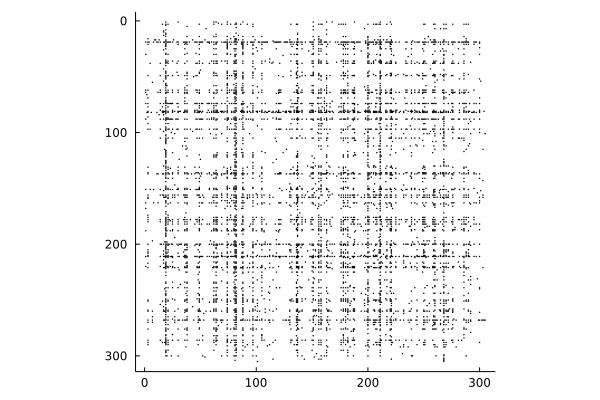

In [11]:
spy(A)

In [12]:
issymmetric(A)

true

In [13]:
L = SimpleGraph(A)

{305, 2834} undirected simple Int64 graph

In [14]:
G = SimpleGraph(10)
add_edge!(G, 7, 5)
add_edge!(G, 3, 5)
add_edge!(G, 5, 2)

true

In [15]:
cc = scomponents(A) # connected components

MatrixNetworks.Strong_components_output([1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [305], 1, MatrixNetwork{Int64}(305, [1, 13, 15, 56, 57, 60, 61, 67, 70, 71  …  5619, 5626, 5628, 5629, 5656, 5658, 5659, 5665, 5667, 5669], [19, 30, 62, 64, 74, 88, 151, 163, 168, 188  …  115, 143, 156, 158, 221, 268, 81, 268, 101, 268], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [16]:
cc.sizes # only one component with 305 nodes

1-element Array{Int64,1}:
 305

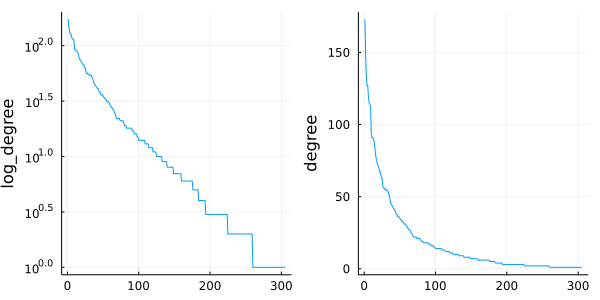

In [17]:
degrees = sum(A, dims=2)[:]
p1 = plot(sort(degrees, rev=true), 
          ylabel="log_degree", 
          legend=false, 
          yaxis=:log)
p2 = plot(sort(degrees, rev=true), ylabel="degree", legend=false)
plot(p1, p2, size=(600, 300))

In [18]:
maxdegreeid = argmax(degrees)
uairports[maxdegreeid]

"ATL"

In [19]:
us10m = dataset("us-10m")

Vega JSON Dataset

In [27]:
#@vlplot(width=500, height=300) +
#@vlplot(mark={:geoshape, fill=:lightgray, stroke=:white},
#        data={values=us10m, format={type=:topojson, feature=:states}},
#        projections={type=:albersUsa}) +
#@vlplot(:circle, 
#        data=airports_df_subset, 
#        projection={type=:albersUsa},
#        longitude="longitude:q",
#        latitude="latitude:q",
#        size={value=10},
#        color={value=:steelblue}) + 
@vlplot(:rule,
        data=flightsairport,
        transform=[{filter={field=:origin, equal=:ATL}},
                   {lookup=:origin,
                    from={data=airports_df_subset,
                          keys=:iata,
                          fields=["latitude", "longitude"]},
                    as=["origin_latitude", "origin_longitude"]},
                   {lookup=:destination,
                    from={data=airports_df_subset,
                          key=:iata,
                          fields=["latitude", "longitude"]},
                    as=["dest_latitude", "dest_longitude"]}],
        projection={type=:albersUsa},
        longitude="origin_longitude:q",
        latitude="origin_latitude:q",
        longitude2="dest_longitude:q",
        latitude2="dest_latitude:q")

TypeError: Cannot read property 'signal' of undefined
    at Scope$1.fieldRef (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:3556:18)
    at cache (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1841:22)
    at DataScope.lookupRef (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1905:14)
    at parseIndexParameter (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1657:37)
    at parseParameter$1 (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1617:14)
    at parseParameters (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1

TypeError: Cannot read property 'signal' of undefined
    at Scope$1.fieldRef (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:3556:18)
    at cache (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1841:22)
    at DataScope.lookupRef (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1905:14)
    at parseIndexParameter (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1657:37)
    at parseParameter$1 (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1617:14)
    at parseParameters (/Users/dsatterthwaite/.julia/artifacts/07b35f566ff32f265444804e50108d7f7f217576/node_modules/vega-parser/build/vega-parser.js:1

## Shortest Path Problem

In [29]:
ATL_paths = dijkstra(A, maxdegreeid)

([1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0  …  1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0], [19, 82, 19, 19, 151, 82, 270, 19, 17, 17  …  19, 19, 154, 268, 19, 54, 268, 221, 268, 268])

In [30]:
maximum(ATL_paths[1])

3.0

In [31]:
@show stop1 = argmax(ATL_paths[1])
@show uairports[stop1]

stop1 = argmax(ATL_paths[1]) = 123
uairports[stop1] = "GST"


"GST"

In [33]:
@show stop2 = ATL_paths[2][stop1]
@show uairports[stop2]

stop2 = (ATL_paths[2])[stop1] = 152
uairports[stop2] = "JNU"


"JNU"

In [34]:
@show stop3 = ATL_paths[2][stop2]
@show uairports[stop3]

stop3 = (ATL_paths[2])[stop2] = 259
uairports[stop3] = "SEA"


"SEA"

In [38]:
@show stop4 = ATL_paths[2][stop3]
@show uairports[stop4]

# e.g path is GST -> Juneau -> Seattle -> Atlanta

stop4 = (ATL_paths[2])[stop3] = 19
uairports[stop4] = "ATL"


"ATL"

## Minimum Spanning Tree

In [39]:
ti, tj, tv, nverts = mst_prim(A)

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  296, 297, 298, 299, 300, 301, 302, 303, 304, 305], [66, 286, 19, 151, 82, 197, 19, 17, 17, 19  …  19, 182, 231, 268, 141, 54, 268, 156, 268, 101], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 305)

In [42]:
df_edges = DataFrame(:ei => uairports[ti], :ej => uairports[tj])

,ei,ej
,String,String
1,ABI,CMI
2,ABQ,TPA
3,ABY,ATL
4,ACK,JFK
5,ACT,DFW
6,ACV,MRY
7,ACY,ATL
8,ADK,ANC
9,ADQ,ANC


## Page Rank

In [44]:
v = MatrixNetworks.pagerank(A, 0.85)

305-element Array{Float64,1}:
 0.0020923348051623326
 0.0009436892155004145
 0.006119901015186467
 0.0006607117011710984
 0.0008603728281911192
 0.0006445871130434956
 0.0015924822798577083
 0.0009129198498983633
 0.0007673129766872152
 0.0007673129766872152
 0.0009549149040574479
 0.0010558743385657198
 0.0013344573507603737
 ⋮
 0.0006445871130434956
 0.0027593013724303977
 0.0006607117011710984
 0.001475388547065869
 0.0017187137444043738
 0.0006494983427307581
 0.0043517606900941854
 0.0016096866743709605
 0.0006494983427307581
 0.0015555904158222685
 0.0007866027711239782
 0.0008103673010237374

In [45]:
sum(v)

0.9999999999999999

In [52]:
insertcols!(airports_df_subset, 7, (:pagerank_value => v))

LoadError: [91mArgumentError: Column pagerank_value is already present in the data frame which is not allowed when `makeunique=true`[39m

## Clustering Coeffs

In [53]:
cc = clustercoeffs(A)
cc[findall(cc .<= eps())] .= 0
cc

305-element Array{Float64,1}:
   0.8333333333333334
   1.0
   0.6475609756097561
   0.0
   0.6666666666666666
   3.8394470233569706e151
   0.5333333333333333
   1.0
   0.0
   0.0
   1.0
   1.0
   1.0
   ⋮
   0.0
   0.9779411764705882
   0.0
   1.0
   0.0
 NaN
   0.5897435897435898
   0.0
   0.0
   0.6666666666666666
   1.0
   1.0